In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

### Loading results of Behaviour Space

Data can be downloaded from this folder: https://drive.google.com/drive/folders/1Z-0xZ2d7uZQC_mTyIv5WrFKSS-VN8Bgb and later saved to the same local folder where this notebook is saved.

In [3]:
ss2 = pd.read_csv('ss2_wealth_distribution.csv', skiprows=6)
ss2.head()

,[run number],initial-population,[step],(gini-index-reserve / count turtles) * 2,(sugar-histogram)
0,9,10,0,0.0,[0 0 5 0 0 0 2 2 0 1]
1,10,10,0,0.0,[0 0 2 1 2 1 1 0 2 1]
2,7,10,0,0.0,[0 0 2 2 0 2 0 1 2 1]
3,6,10,0,0.0,[0 0 0 1 3 2 0 0 1 3]
4,2,10,0,0.0,[0 2 2 1 1 0 2 1 0 1]


### Obtaining basic data of the Behaviour Space results

In [4]:
row_count = ss2.shape[0]
print("Number of rows in ss2:", row_count)

Number of rows in ss2: 600200


In [5]:
print("Name of columns:", ss2.columns.tolist())

Name of columns: ['[run number]', 'initial-population', '[step]', '(gini-index-reserve / count turtles) * 2', '(sugar-histogram)']


In [6]:
unique_initial_population = ss2['initial-population'].unique()

print("Unique values in 'initial-population':", unique_initial_population)

Unique values in 'initial-population': [ 10 110 210 310 410 510 610 710 810 910]


### Preprocessing data

In [7]:
#Rename columns

ss2.rename(columns={
    '[run number]': 'run_number',
    'initial-population': 'init_pop',
    '[step]': 'step',
    '(gini-index-reserve / count turtles) * 2': 'gini_index',
    '(sugar-histogram)': 'sugar_histogram',
}, inplace=True)

ss2.head()

,run_number,init_pop,step,gini_index,sugar_histogram
0,9,10,0,0.0,[0 0 5 0 0 0 2 2 0 1]
1,10,10,0,0.0,[0 0 2 1 2 1 1 0 2 1]
2,7,10,0,0.0,[0 0 2 2 0 2 0 1 2 1]
3,6,10,0,0.0,[0 0 0 1 3 2 0 0 1 3]
4,2,10,0,0.0,[0 2 2 1 1 0 2 1 0 1]


In [8]:
#convert sugar_histogram to numpy array and integers
ss2["sugar_histogram"] = ss2["sugar_histogram"].apply(lambda x: np.array(list(map(int, x.strip("[]").split())), dtype=int))
ss2.head()

,run_number,init_pop,step,gini_index,sugar_histogram
0,9,10,0,0.0,"[0, 0, 5, 0, 0, 0, 2, 2, 0, 1]"
1,10,10,0,0.0,"[0, 0, 2, 1, 2, 1, 1, 0, 2, 1]"
2,7,10,0,0.0,"[0, 0, 2, 2, 0, 2, 0, 1, 2, 1]"
3,6,10,0,0.0,"[0, 0, 0, 1, 3, 2, 0, 0, 1, 3]"
4,2,10,0,0.0,"[0, 2, 2, 1, 1, 0, 2, 1, 0, 1]"


I decided to do 20 repetitions in order to account for different variances that could happen on a single repetition. But in order to analyse the outcomes of the model, I will use the average value of this 20 repetitions

In [9]:
#Group by initial population and step
ss2_grouped = ss2.groupby(['init_pop', 'step']).mean().reset_index()
ss2_grouped.drop(columns=['run_number'], inplace=True)
ss2_grouped.head()

,init_pop,step,gini_index,sugar_histogram
0,10,0,0.000000,"[0.0, 0.15, 1.6, 1.05, 1.45, 0.95, 0.95, 1.15,..."
1,10,1,0.230417,"[0.0, 0.55, 1.1, 1.15, 1.0, 1.35, 1.25, 1.05, ..."
2,10,2,0.237038,"[0.25, 0.45, 0.85, 1.35, 1.0, 1.4, 1.35, 0.8, ..."
3,10,3,0.233884,"[0.25, 0.4, 0.85, 1.05, 1.5, 1.45, 1.0, 1.2, 0..."
4,10,4,0.245906,"[0.2, 0.6, 0.9, 1.2, 1.2, 1.3, 1.4, 0.95, 0.35..."


In [10]:
#check that the amount of rows has reduced 20 times
ss2_grouped.shape[0]

30010

I decided to add as a reporter the amount of turtles by bin in a histogram of wealth distribution. In order to be able to compare them, I'll convert this values to percentages, adding up to 100% of turtles.

In [11]:
#Modify sugar_histogram values from float to percentage and round to 2 decimal places
ss2_grouped['sugar_histogram'] = ss2_grouped['sugar_histogram'].apply(lambda x: np.round((np.array(x) / np.sum(x)) * 100, 2))
ss2_grouped.head()

,init_pop,step,gini_index,sugar_histogram
0,10,0,0.000000,"[0.0, 1.5, 16.0, 10.5, 14.5, 9.5, 9.5, 11.5, 1..."
1,10,1,0.230417,"[0.0, 5.5, 11.0, 11.5, 10.0, 13.5, 12.5, 10.5,..."
2,10,2,0.237038,"[2.51, 4.52, 8.54, 13.57, 10.05, 14.07, 13.57,..."
3,10,3,0.233884,"[2.58, 4.12, 8.76, 10.82, 15.46, 14.95, 10.31,..."
4,10,4,0.245906,"[2.08, 6.25, 9.38, 12.5, 12.5, 13.54, 14.58, 9..."


In order to do multiple types of analysis, I have created distinct dataframes grouping by different columns

In [12]:
#Group by initial population and get the last value of each group. This will ignore values of step and give me only one row per initial population
ss2_grouped_initpop = ss2_grouped.groupby('init_pop').last().reset_index()
ss2_grouped_initpop.head()

,init_pop,step,gini_index,sugar_histogram
0,10,3000,0.321808,"[17.2, 0.0, 0.0, 22.93, 0.0, 0.0, 24.2, 0.0, 0..."
1,110,3000,0.293526,"[7.11, 3.78, 8.24, 15.42, 5.52, 6.88, 21.24, 5..."
2,210,3000,0.356125,"[12.67, 10.82, 8.7, 7.29, 9.78, 11.74, 6.13, 8..."
3,310,3000,0.382095,"[18.15, 12.34, 1.08, 4.19, 14.85, 14.31, 0.95,..."
4,410,3000,0.380776,"[23.23, 3.59, 3.43, 2.82, 18.84, 10.58, 2.15, ..."


In [13]:
#Group by step and calculate mean values. This will ignore values of initial population and give me only one row per step
ss2_grouped_step = ss2_grouped.groupby('step').mean().reset_index()
ss2_grouped_step.head()


,step,init_pop,gini_index,sugar_histogram
0,0,460.0,0.000000,"[0.0, 4.385, 10.180000000000001, 14.001, 9.900..."
1,1,460.0,0.240771,"[0.36300000000000004, 5.938000000000001, 12.95..."
2,2,460.0,0.256622,"[3.3959999999999995, 7.571000000000001, 11.888..."
3,3,460.0,0.268895,"[4.852, 8.107, 13.38, 14.867999999999999, 15.4..."
4,4,460.0,0.284149,"[5.784, 10.129999999999999, 13.758999999999997..."


In [14]:
#Extract sugar_histogram values (they represent the mean values by step ignoring initial population) and turn them into columns of a new dataframe
time_histogram = pd.DataFrame(ss2_grouped_step['sugar_histogram'].values.tolist(), index=ss2_grouped_step["step"])
time_histogram.head()

,0,1,2,3,4,5,6,7,8,9
step,,,,,,,,,,
0,0.000,4.385,10.180,14.001,9.900,13.674,13.613,9.906,14.308,10.034
1,0.363,5.938,12.951,13.857,12.206,14.131,13.935,13.870,9.407,3.343
2,3.396,7.571,11.888,13.994,13.883,16.461,13.382,10.198,6.180,3.045
3,4.852,8.107,13.380,14.868,15.484,15.431,12.568,8.412,4.229,2.666
4,5.784,10.130,13.759,15.350,15.238,14.783,11.411,7.125,3.742,2.686


### Data analysis

#### Gini index analysis

First, let's see how does the initial population affect the average gini index

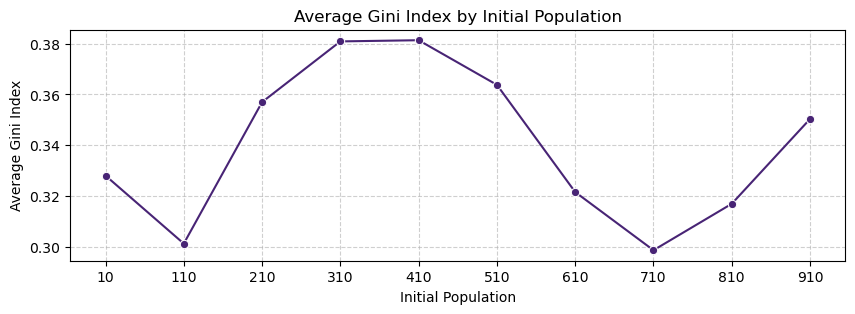

In [28]:
#Graph of average gini index by initial population
gini_avg_per_pop = ss2_grouped.groupby('init_pop')['gini_index'].mean().reset_index()

color = cm.viridis(0.1)  

# Graficar el gráfico de líneas
plt.figure(figsize=(10, 3))
sns.lineplot(x='init_pop', y='gini_index', data=gini_avg_per_pop, marker='o', color=color)

plt.xlabel('Initial Population')
plt.ylabel('Average Gini Index')
plt.title('Average Gini Index by Initial Population')
plt.xticks(np.arange(10, 911, 100))  # Ajustar los ticks del eje x
plt.grid(True, linestyle='--', alpha=0.6)  # Dotted grid lines
plt.show()

In [29]:
# Get the last value of each initial population group
last_step_gini = ss2_grouped.groupby('init_pop').mean().reset_index()

# Sort by Gini index in descending order
sorted_gini = last_step_gini.sort_values(by='gini_index', ascending=False)

print(sorted_gini[['init_pop', 'gini_index']])

   init_pop  gini_index
4       410    0.381380
3       310    0.380916
5       510    0.363787
2       210    0.356978
9       910    0.350330
0        10    0.327997
6       610    0.321507
8       810    0.316882
1       110    0.301180
7       710    0.298572


Now, I'll analyse the evolution of the gini index over time comparing the values obtained depending on the initial population

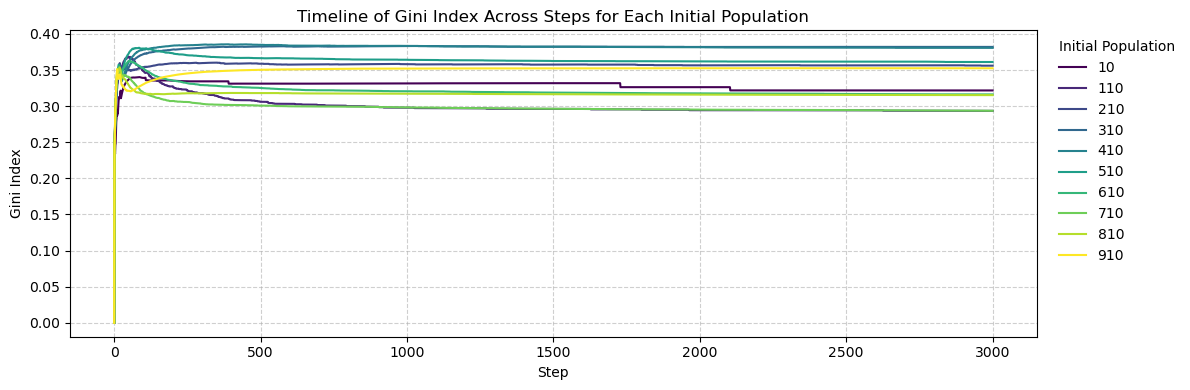

In [50]:
plt.figure(figsize=(12, 4))

# Plot each initial population as a line
colors = cm.viridis(np.linspace(0, 1, len(unique_initial_population)))
for i, population in enumerate(unique_initial_population):
    subset = ss2_grouped[ss2_grouped['init_pop'] == population]
    plt.plot(subset['step'], subset['gini_index'], label=f'{population}', color=colors[i])

plt.xlabel('Step')
plt.ylabel('Gini Index')
plt.title('Timeline of Gini Index Across Steps for Each Initial Population')
plt.legend(title='Initial Population', bbox_to_anchor=(1.01, 1.01), loc='upper left', frameon=False, alignment='left')
plt.grid(True, linestyle='--', alpha=0.6)  # Dotted grid lines
plt.tight_layout()
plt.show()

We can see that over time, values tend to stabilize, but let's zoom in to the first steps to be able to assess the changes

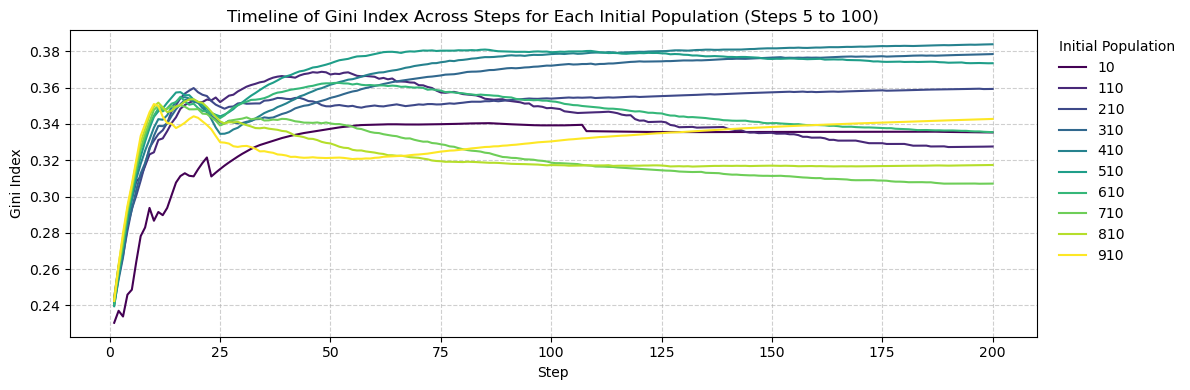

In [52]:
plt.figure(figsize=(12, 4))

# Filter data for steps greater than 5 and less than or equal to 100
ss2_grouped_filtered = ss2_grouped[(ss2_grouped['step'] >= 1) & (ss2_grouped['step'] <= 200)]

# Plot each initial population as a line
colors = cm.viridis(np.linspace(0, 1, len(unique_initial_population)))
for i, population in enumerate(unique_initial_population):
    subset = ss2_grouped_filtered[ss2_grouped_filtered['init_pop'] == population]
    plt.plot(subset['step'], subset['gini_index'], label=f'{population}', color=colors[i])

plt.xlabel('Step')
plt.ylabel('Gini Index')
plt.title('Timeline of Gini Index Across Steps for Each Initial Population (Steps 5 to 100)')
plt.legend(title='Initial Population', bbox_to_anchor=(1.01, 1.01), loc='upper left', frameon=False, alignment='left')
plt.grid(True, linestyle='--', alpha=0.6)  # Dotted grid lines
plt.tight_layout()
plt.show()

#### Wealth distribution by initial population

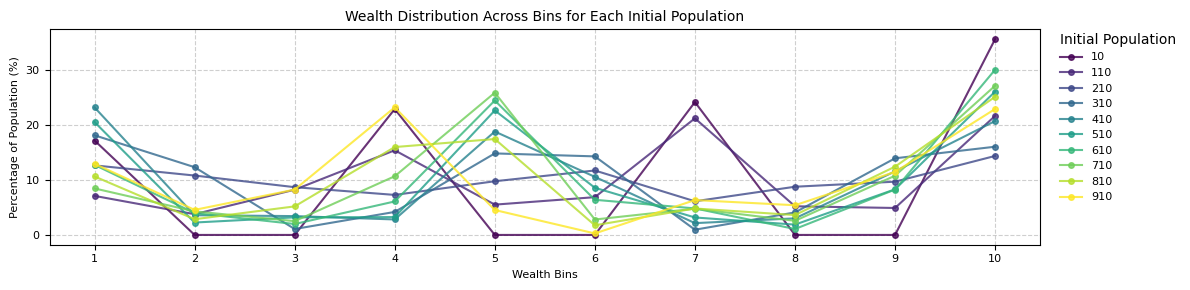

In [19]:
plt.figure(figsize=(12, 3))

# Generate colors from the 'viridis' palette
colors = cm.viridis(np.linspace(0, 1, len(unique_initial_population)))

# Plot each initial population with differentiated colors
for i, population in enumerate(unique_initial_population):
    subset = ss2_grouped_initpop[ss2_grouped_initpop['init_pop'] == population]
    plt.plot(range(1, 11), subset['sugar_histogram'].values[0], 
             marker='o', markersize=4, linestyle='-', linewidth=1.5, alpha=0.8, 
             color=colors[i], label=f'{population}')

# Improved labels and titles
plt.xlabel('Wealth Bins', fontsize=8)
plt.ylabel('Percentage of Population (%)', fontsize=8)
plt.title('Wealth Distribution Across Bins for Each Initial Population', fontsize=10)

# Adjust axis ticks
plt.xticks(range(1, 11), fontsize=8)
plt.yticks(fontsize=8)
# Move the legend outside the plot for better clarity and align title and content to the left
plt.legend(title='Initial Population', title_fontsize=10, fontsize=8, bbox_to_anchor=(1.01, 1.03), loc='upper left', frameon=False,alignment='left')

#Edit graphics aesthetics
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


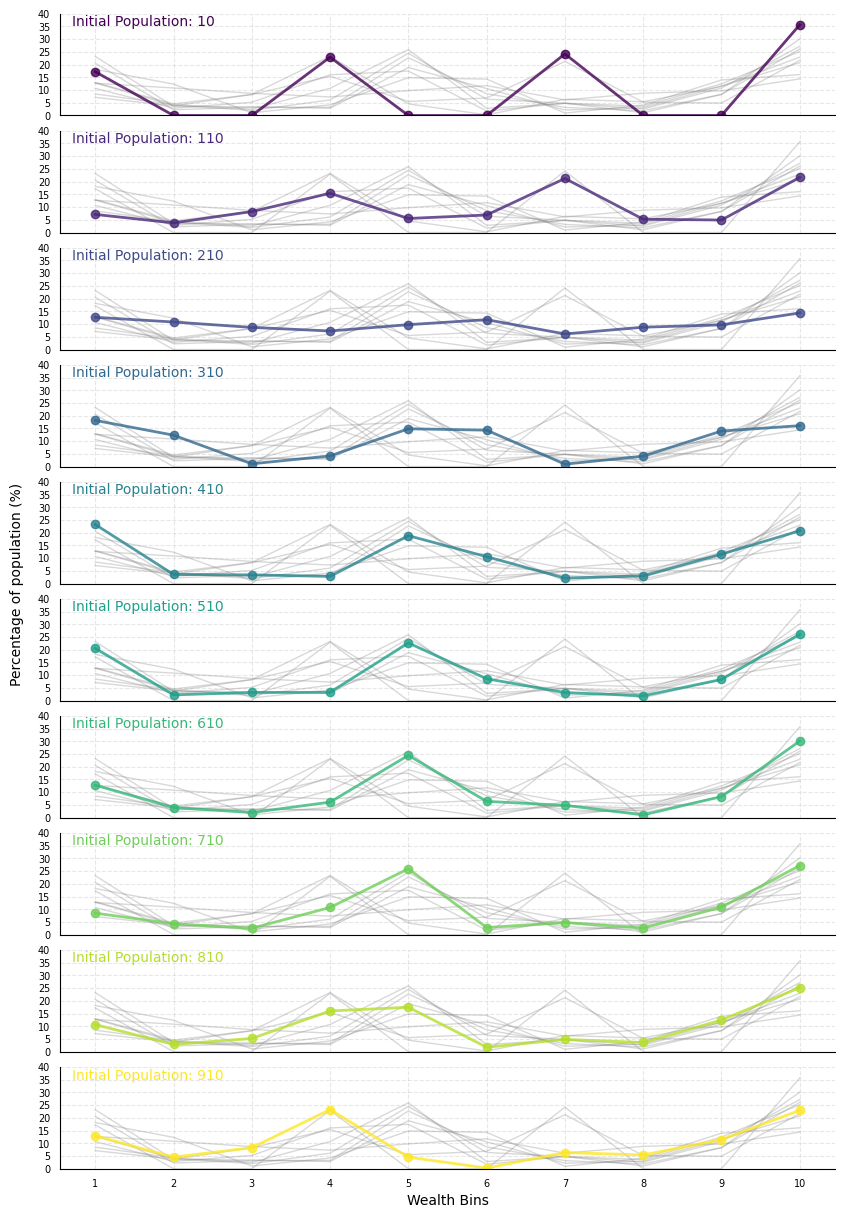

In [71]:
# Define the number of populations
num_populations = len(unique_initial_population)

# Create the figure with multiple stacked subplots
fig, axes = plt.subplots(num_populations, 1, figsize=(10, 1.5 * num_populations), sharex=True)

# Generate colors from the 'viridis' palette
colors = cm.viridis(np.linspace(0, 1, num_populations))

# Plot each distribution in a separate subplot
for i, (ax, pop, color) in enumerate(zip(axes, unique_initial_population, colors)):
    # Plot all other histograms in grey
    for other_pop in unique_initial_population:
        if other_pop != pop:
            other_subset = ss2_grouped_initpop[ss2_grouped_initpop['init_pop'] == other_pop]['sugar_histogram'].values[0]
            ax.plot(range(1, 11), other_subset, color='grey', alpha=0.3, linewidth=1)

    # Plot the histogram line for the current population
    subset = ss2_grouped_initpop[ss2_grouped_initpop['init_pop'] == pop]['sugar_histogram'].values[0]
    ax.plot(range(1, 11), subset, marker='o', linestyle='-', linewidth=2, color=color, alpha=0.8)

    # Remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove Y-axis ticks for a cleaner design
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    # Set Y-axis label and limits
    ax.set_ylim(0, 30)

    # Place initial population text slightly higher to the right of the plot
    ax.text(0.7, ax.get_ylim()[1] + 9.5, f'Initial Population: {pop}', fontsize=10, color=color, verticalalignment='top')

    # Add subtle grid to each subplot
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_yticks(np.arange(0, 41, 5))
    ax.set_xticks(np.arange(1, 11, 1))
    ax.tick_params(axis='both', labelsize=7)

# X-axis label (only in the last subplot)
axes[-1].set_xlabel('Wealth Bins', fontsize=10)

# Common Y-axis label
fig.text(0.075, 0.5, 'Percentage of population (%)', va='center', rotation='vertical', fontsize=10)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.15)

plt.show()


#### Wealth distribution over time

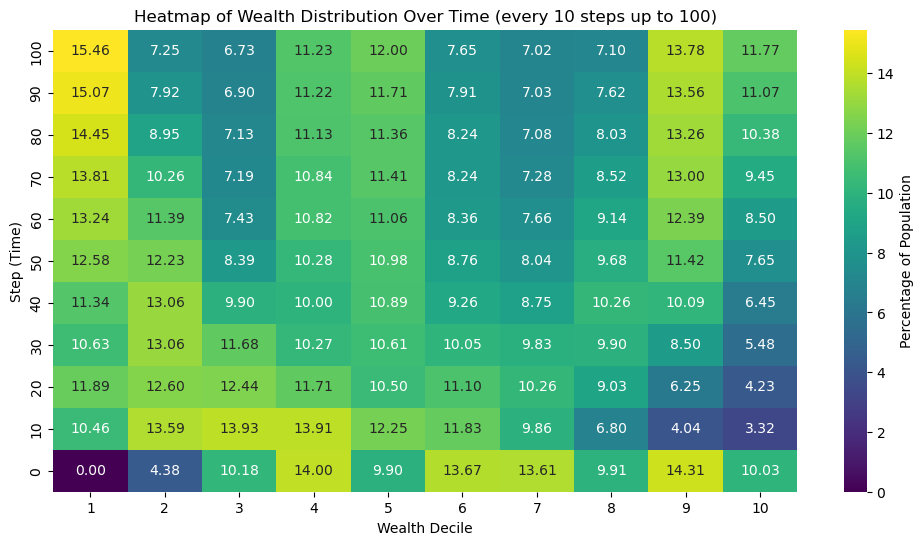

In [74]:
# Choose key steps to report in the heatmap. They will be steps that are multiples of 10 and less than or equal to 100
time_histogram_filter = time_histogram[(time_histogram.index % 10 == 0) & (time_histogram.index <= 100)]

# Plot the heatmap with annotations
plt.figure(figsize=(12, 6))
sns.heatmap(time_histogram_filter.iloc[::-1], cmap="viridis", cbar_kws={'label': 'Percentage of Population'}, annot=True, fmt=".2f")
plt.ylabel("Step (Time)")
plt.xlabel("Wealth Decile")
plt.title("Heatmap of Wealth Distribution Over Time (every 10 steps up to 100)")
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(1, 11))
plt.show()